In [102]:
import pandas as pd
import pickle


In [133]:
data = pd.read_csv('heart.csv')

In [104]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [106]:
data=data.drop_duplicates()

In [107]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [74]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [75]:
data['target'].unique()

array([1, 0], dtype=int64)

In [76]:
model = LogisticRegression()

In [77]:
x = data.drop(['target'],axis=1)

In [78]:
y= data['target']

In [88]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0, stratify=y)

In [89]:
model.fit(x_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [90]:
pre_train = model.predict(x_train)

In [91]:
mean_absolute_error(pre_train, y_train)

0.16115702479338842

In [92]:
model.score(x_train, y_train)

0.8388429752066116

In [93]:
pre_test = model.predict(x_test)

In [94]:
mean_absolute_error(pre_test, y_test)

0.11475409836065574

In [95]:
model.score(x_test, y_test)

0.8852459016393442

In [87]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()

In [22]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [23]:
x_train[0].reshape(1,-1)

array([[ 0.1762246 ,  0.63794729, -0.95894245, -0.09681599,  0.76359577,
         2.21414521, -1.02899151, -1.99995062,  1.47790748,  0.51824669,
        -2.22991675, -0.71743331,  1.09984435]])

In [24]:
import pickle

In [25]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [26]:
real_data = data.drop('target', axis=1)

In [27]:
real_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [28]:
real_data.iloc[100].values

array([ 42. ,   1. ,   3. , 148. , 244. ,   0. ,   0. , 178. ,   0. ,
         0.8,   2. ,   2. ,   2. ])

In [29]:
real_data2 = real_data.iloc[100].values.reshape(1,-1)

In [30]:
real_data2

array([[ 42. ,   1. ,   3. , 148. , 244. ,   0. ,   0. , 178. ,   0. ,
          0.8,   2. ,   2. ,   2. ]])

In [31]:
with open('scaler1.pkl', 'wb') as f :
    pickle.dump(scaler, f)

In [32]:
with open('model1.pkl', 'wb') as f :
    pickle.dump(model, f)

In [33]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [34]:
real = data.drop('target', axis=1)

In [35]:
real

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [36]:
real111 = [35, 1, 2, 135, 240, 0, 0, 160, 1, 2.1, 1, 0, 1]

In [39]:
import numpy as np

In [41]:
real_data2=np.array([35, 1, 2, 135, 240, 0, 0, 160, 1, 2.1, 1, 0, 1]).reshape(1, -1)

In [42]:
real_data2

array([[ 35. ,   1. ,   2. , 135. , 240. ,   0. ,   0. , 160. ,   1. ,
          2.1,   1. ,   0. ,   1. ]])

In [43]:
with open('scaler1.pkl', 'rb') as f :
    scal1 = pickle.load(f)

In [44]:
real_pre = scal1.transform(real_data2)

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [45]:
real_pre

array([[-2.06022957,  0.86189161,  1.1602387 ,  0.20545483, -0.27866504,
        -0.26490647, -0.92113237,  0.42400775,  1.28536917,  0.76216409,
        -0.77958446, -0.70501289, -2.34484153]])

In [46]:
with open('model1.pkl', 'rb') as f :
    model1 = pickle.load(f)

In [47]:
model1.predict(real_pre)[0]

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0

In [108]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

In [112]:
corr = data.corr().round(2)

<AxesSubplot:>

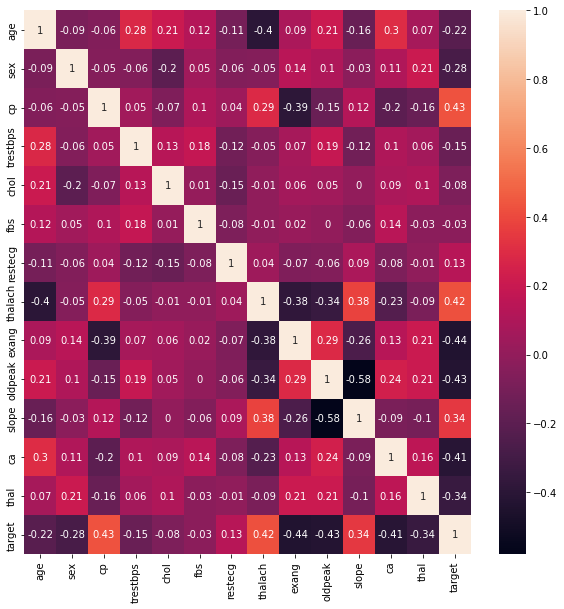

In [113]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [124]:
data_desc=data.describe()

In [120]:
data['fbs'].value_counts()

0    257
1     45
Name: fbs, dtype: int64

In [128]:
data_desc

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [130]:
data_desc['mean']

KeyError: 'mean'

In [131]:
##풀이

In [134]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [137]:
from sklearn.preprocessing import PolynomialFeatures

In [139]:
x = data.drop('target', axis=1)
y = data['target']

In [164]:
pol = PolynomialFeatures(degree=2) #변수 늘리기

In [141]:
x = pol.fit_transform(x)

In [142]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0, stratify=y)

In [146]:
model = LogisticRegression()

In [148]:
model.fit(x_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [149]:
model.score(x_train, y_train)

0.8553719008264463

In [152]:
model.coef_ #W값 Wx+b

array([[ 1.27785289e-06,  4.21112936e-05, -1.00043922e-05,
         1.07956617e-05,  8.62591846e-05,  1.57560377e-04,
         3.20792506e-07,  8.41245078e-06,  1.08097701e-04,
        -1.07530743e-05, -7.63834881e-06,  5.82984871e-06,
        -5.98346100e-06, -9.42510832e-06,  1.58546095e-03,
        -5.85807754e-04,  5.14163306e-04,  1.26283288e-03,
         9.12836125e-05, -9.65210239e-06,  4.68541702e-04,
        -2.21303875e-03, -5.85873423e-04, -3.38689464e-04,
         2.40862665e-04, -4.41143859e-04, -4.93659311e-04,
        -1.00043922e-05, -4.15317691e-06, -1.28158383e-03,
        -2.56534484e-03,  6.61837823e-07,  1.45796013e-06,
        -1.41370186e-03, -9.14911696e-06, -1.72956255e-05,
        -1.08992402e-05, -8.95611646e-06, -2.96448274e-05,
         6.60454370e-06,  1.44733588e-03,  1.82692728e-03,
         5.27710092e-06,  8.58108133e-06,  1.57748349e-03,
         1.32956800e-06,  3.91124186e-06,  1.52257740e-05,
         6.73361751e-06,  1.36872674e-05, -5.47763234e-0

In [163]:
data.columns #x값 Wx+b

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [153]:
model.intercept_ #b값 Wx+b

array([1.27785302e-06])

In [165]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [166]:
data['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [167]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64